# 앙상블 기법

------

앙상블 기법은 머신러닝에서 여러 개의 모델을 조합하여 더 나은 예측 성능을 도출하는 기법을 의미한다. 

앞에서 학습한 트리 모형만으로는 예측력이 떨어지기 때문에 일련의 트리들을 종합하여 더 나은 방법을 모색할 수 있다.

예를 들어, 생성된 트리들을 바탕으로 투표 방법과 다수결 원칙을 이용하여 예측하는 방법이 있다.

여러 개의 예측기로부터 예측을 종합하여 더 좋은 예측을 얻는 방법인 앙상블 학습 (ensemble learning)을 이용하는 것이다.

먼저 트리 모델을 통해 앙상블 기법들을 살펴볼 것이지만, 앙상블 학습은 트리 뿐만이 아닌 다른 머신 러닝 기법에도 이용된다.

앙상블 방법은 개별 모델의 한계를 보완하고, 과적합을 방지하며, 전반적인 모델 성능을 향상시킬 수 있다. 

앙상블 기법은 앙상블에 이용하는 분류기들이 독립적일 경우 더 효과가 높다.

주요한 앙상블 기법로 크게 배깅과 부스팅으로 구분할 수 있다. 

또한 간단한 투표 알고리즘 또한 앙상블 기법으로 볼 수 있다.

## Voting

#### [`sklearn.ensemble.VotingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

`sklearn.ensemble.VotingClassifier`는 다양한 분류 모델들의 예측 결과를 결합하여 최종 예측값을 도출하는 ensemble 방법을 구현

이 방법론은 각 분류 모델의 예측값들을 투표하여 다수결 원칙에 따라 최종 예측값을 도출한다. 

이때, 각 분류 모델들이 동등하게 기여할 수 있도록 각 모델의 가중치를 조정할 수 있다.

`sklearn.ensemble.VotingClassifier`는 hard voting과 soft voting 방식을 지원한다. 

hard voting은 다수결 원칙에 따라 가장 많이 선택된 클래스를 최종 예측값으로 선택하며, soft voting은 각 클래스에 대한 확률 예측값을 평균내어 가장 높은 확률값을 가지는 클래스를 선택한다.

[`sklearn.datasets.load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) 데이터를 이용하여 간단한 예제를 진행해 보자.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30)
X_train, X_test, y_train, y_test = train_test_split(X, y)

앙상블 방법에 대해 간단히 살펴보기 위해, 몇 가지 분류기들을 정의하여 살펴보자.

이전에 공부했던 [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [`GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), [`QuadratciDiscriminatAnalysis`](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html), [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) 들을 활용해 보자.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

lr = LogisticRegression()
tclf = DecisionTreeClassifier()
gnb = GaussianNB()
qda = QuadraticDiscriminantAnalysis()

[`sklearn.ensemble.VotingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)는 몇 가지 분류기를 리스트로 입력받아, 투표를 하는 데에 활용된다.

In [3]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('log_reg', lr), ('tree', tclf), ('gauss_nb', gnb), ('quadratic', qda)], voting='hard')
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg', LogisticRegression()),
                             ('tree', DecisionTreeClassifier()),
                             ('gauss_nb', GaussianNB()),
                             ('quadratic', QuadraticDiscriminantAnalysis())])

In [4]:
from sklearn.metrics import accuracy_score
y_pred = eclf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.888


[`sklearn.inspection.DecisionBoundaryDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html)를 이용하여 경계선을 보다 쉽게 그릴 수 있다.

[`.from_estimator()`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay.from_estimator) method를 통하여 그림을 그리며 훈련된 분류기를 전달한다.

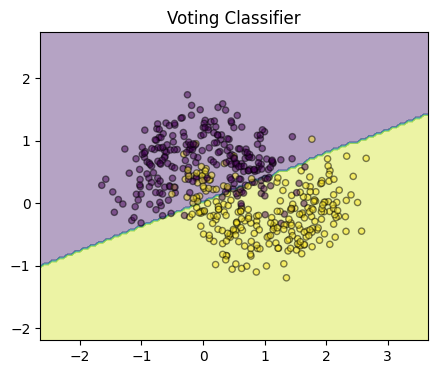

In [7]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

_, ax = plt.subplots(1, 1, sharex="col", sharey="row", figsize=(5,4))

DecisionBoundaryDisplay.from_estimator(
    eclf, X[:, :2], alpha=0.4, ax=ax, response_method="predict"
)
ax.scatter(X[:, 0], X[:, 1], c = y, s = 20, edgecolor="k", alpha=0.5)
ax.set_title("Voting Classifier")
plt.show()

각 개별 분류기의 성능을 살펴보자. 거의 비슷비슷하다.

In [8]:
lr.fit(X_train, y_train).score(X_test, y_test)

0.888

In [9]:
tclf.fit(X_train, y_train).score(X_test, y_test)

0.888

In [10]:
gnb.fit(X_train, y_train).score(X_test, y_test)

0.896

In [11]:
qda.fit(X_train, y_train).score(X_test, y_test)

0.888

Voting 알고리즘의 경우 다양한 분류 알고리즘을 적용할 경우 높은 예측 성능을 보일 수도 있지만, 각 분류 알고리즘의 예측 결과가 비슷하게 나오는 경우에는 성능 향상이 없을 수 있다.

## Bagging

배깅 (bagging)은 bootstrap aggregation이라고도 불리우며 통계 학습에서 분산을 줄이기 위해 사용하는 일반적인 방법이다.

머신러닝 앙상블 방법에서는 학습 데이터 집합을 여러 개의 샘플로 부트스트랩하여, 각 샘플에 서로 다른 모델들을 학습시켜 예측 결과를 결합함으로써 전체적인 예측 성능을 향상시킨다. 

이를 통해 모델의 성능을 향상시키고, 과적합 문제를 줄일 수 있다.

여러 확률변수들을 평균내는 과정을 거치면 분산은 줄어들게 되는데 배깅도 이 원리에 기반한다.

우리는 트리들을 bagging한 모형을 살펴볼 것인데, 먼저 bootstrap의 내용을 복습해 본다.

### Bootstrap

Bootstrap은 통계학에서 estimator의 정확성을 측정하는데 사용할 수 있는 유연하고 강력한 방법이다.

추정량의 표준오차나 신뢰구간을 계산하는 데에 사용할 수 있다.

만약 모집단의 분포를 이미 알고 있다면 시뮬레이션 방법을 통해 샘플을 계속 생성할 수 있지만 그렇지 않을 경우

Bootstrap을 이용하여 주어진 샘플을 다시 resampling하여 새로운 샘플을 만드는 과정을 취할 수 있다.

* sampling with replacement

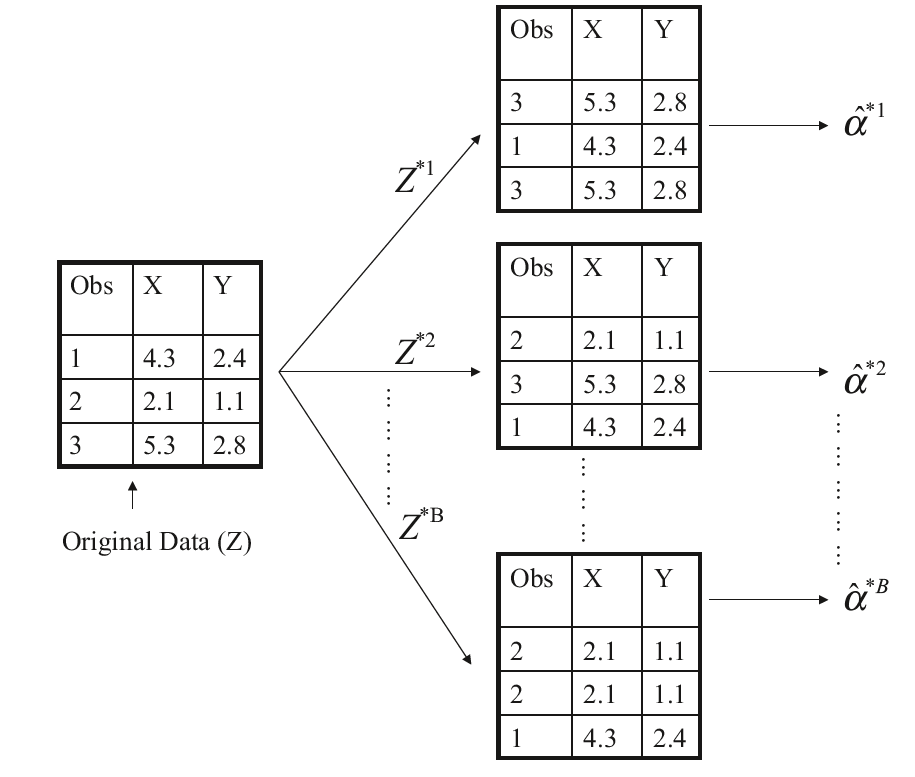

위 그림은 관찰값이 3개 있을 경우 bootstrap 방법에 대해 나타낸다.

3개의 관찰값을 중복 허용의 랜덤 샘플링하여 3개를 뽑아 새로운 데이터셋을 만들고 이를 이용하여 모수를 추정한다.

모수 $\alpha$에 대한 추정치는 각 bootstrap 단계인 $Z^{*r}$마다 계산할 수 있다. 이를 $\hat \alpha^{*r}$라 하자.

이를 $B$번 반복하여, $\hat \alpha^{*r}$들의 표본평균인 $\overline{ \hat \alpha^{*}} $를 bootstrap 추정량으로 삼는다.

Bootstrap 방법에 의한 $\alpha$의 추정량의 표준오차는 다음으로 추정한다.

$$ \mathrm{SE}_B (\hat \alpha) = \sqrt{\frac{1}{B-1} \sum_{r=1}^{B} \left( \hat \alpha^{*r} - \overline{ \hat \alpha^{*}} \right)^2} $$

다시 Bagging의 내용으로 돌아가서, $B$개의 서로 다른 bootstrap 훈련 데이터 셋을 만들었다고 하자.

예를 들어, Regression 문제에 대해 $b$-번째 bootstrap된 훈련 데이터를 이용하여 $\hat f^{*b}$의 적합 모형을 얻었다고 하자.

그러면 $x$에서의 예측은 다음과 같이 얻을 수 있다.

$$ \hat f_{\mathrm{bag}}(x) = \frac{1}{B} \sum_{b=1}^{B} \hat f^{*b}(x) $$

이를 bagging이라 한다.

Classification 문제의 경우 평균을 낼 수 없으므로, 다수결 (majority vote) 개념을 이용한다.

즉, 여러 개의 분류기 $\hat f^{*b}(x)$의 예측값들 중 가장 많은 표를 획득한 클래스가 예측값이 된다.

### Out-of-bag error

Bagging의 test 에러는 비교적 간단하게 추정할 수 있다.

Bootstrap은 중복 추출이라 이 과정에서 일부의 데이터 (대략 2/3)는 자연스럽게 훈련 데이터가 되고 나머지는 훈련에 사용하지 않게 된다.

따라서 훈련에 사용되지 않은 out-of-bag (OOB) 데이터를 이용해 테스트 성능을 시험해 볼 수 있다.

관찰값 입장에서 보면 $i$번째 관찰값은 대략 B/3회 정도 테스트에 참여하게 된다.

Regression의 경우 이를 평균내고, classificaiton의 경우 다수결 투표를 이용하여 예측값을 정한다.

실제 $y$값과 비교하여 테스트 에러를 추정할 수 있다.

따라서, OOB error를 이용하여 테스트 에러를 추정할 경우, cross-validation이나 validation set approach를 수행하지 않아도 될 수 있다.

OOB 방법과 k-cross CV 방법과 비교하자면 OOB 방법은 비교적 빠르게 계산하여 사용할 수 있고, 모델의 대략적인 성능을 평가하기에 적합하다.

K-fold CV는 더 정확한 평가를 제공하지만 추가적인 계산 비용이 들며, 더 많은 계산 리소스와 시간이 필요하다.

### 예제

[`sklearn.datasets.load_breast_cancer`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)를 이용한 분류 문제

먼저 트리 하나를 이용하여 모형을 훈련하여 본다.

In [12]:
from sklearn import datasets
raw_cancer = datasets.load_breast_cancer()

In [13]:
X, y = raw_cancer.data, raw_cancer.target

In [14]:
import pandas as pd
pd.DataFrame(X, columns = raw_cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

[`DecisionTreeClassifier.score(X_test, y_test)`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.score) : 주어진 테스트 데이터에 대해 accuracy를 반환

In [16]:
# 트리 하나를 이용
from sklearn.tree import DecisionTreeClassifier
base_tree = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
base_tree.score(X_test, y_test)

0.9020979020979021

In [17]:
from sklearn import tree 

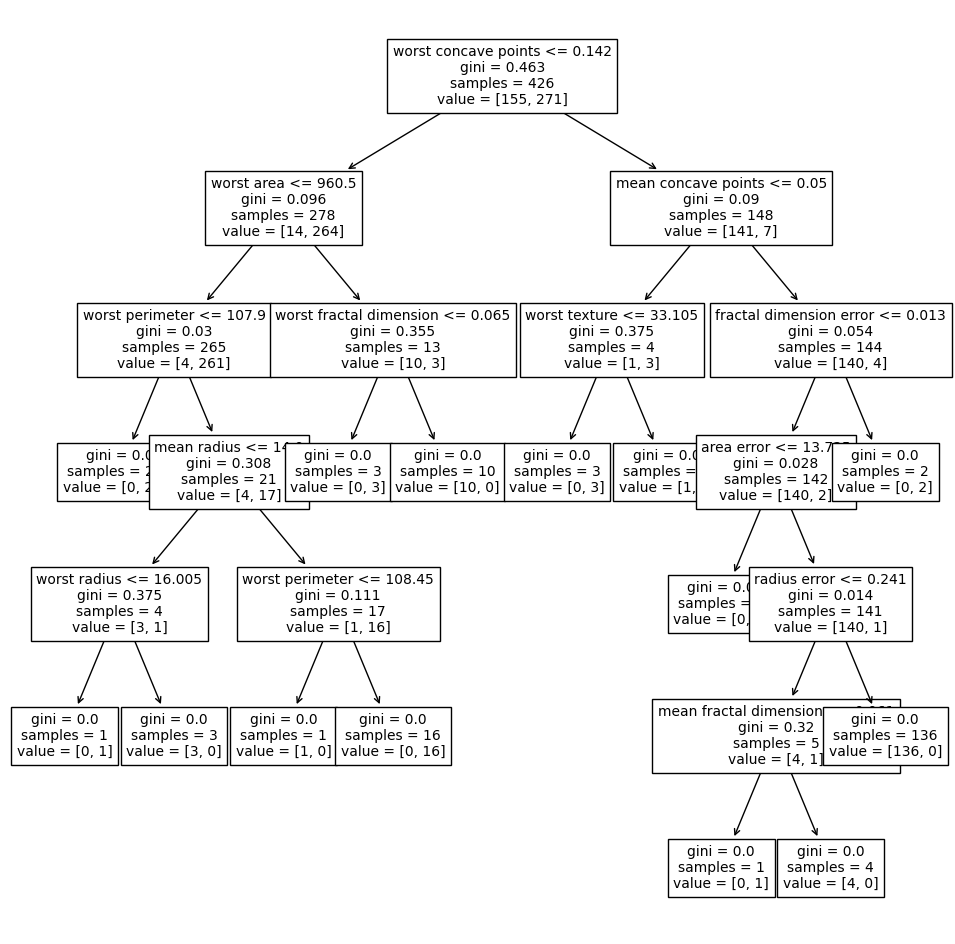

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(base_tree, fontsize=10, feature_names=raw_cancer['feature_names'])
plt.show()

#### [```sklearn.ensemble.BaggingClassifier```](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

Scikit-learn에서 분류 문제에 bagging을 사용하는 방법.

각각의 bootstrap 샘플링된 데이터셋에서 학습된 base learner들을 결합하여 strong learner를 만드는 방법으로, default로 decision Tree를 사용하나 다른 분류기도 가능하다.


* ```base_estimator``` : 기본 추정기, `None`이면 기본 추정기는 DecisionTreeClassifier.

* ```n_estimators``` : ensemble에 사용할 기본 추정기의 숫자.  default=10

* `max_samples` : 각 부트스트랩에서 뽑아내는 샘플의 수. default=1.0 (100%)

* ```oob_score``` :  out-of-bag error를 추정할 것인지 결정하는 boolean 값.

Tree의 숫자 10개를 이용한 bagging

In [19]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1).fit(X_train,y_train)

`.score()` method를 이용하여 accuracy 측정

In [20]:
clf.score(X_test, y_test)

0.9230769230769231

Tree의 숫자 20개

In [21]:
BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1, n_estimators=20)\
.fit(X_train,y_train).score(X_test, y_test)

0.916083916083916

Tree의 숫자 50개

In [22]:
BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1, n_estimators=50)\
.fit(X_train,y_train).score(X_test, y_test)

0.916083916083916

위에서 언급한 out-of-bag error를 계산하기 위해서는 `oob_score = True`로 한다.

이 때는 training과 test셋을 따로 구분할 필요없이 전체를 훈련을 위한 `.fit()`의 인자로 전달한다.

In [23]:
BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1, n_estimators=50, oob_score = True)\
.fit(X,y).oob_score_

0.9525483304042179

In [24]:
# 다른 base estimator를 이용한 bagging도 가능하다.
from sklearn.linear_model import LogisticRegression
BaggingClassifier(LogisticRegression(solver='liblinear'), n_estimators=50, oob_score=True, random_state=1).fit(X,y).oob_score_

0.9507908611599297

#### 실제 데이터를 이용한 예제 

[Bike Sharing Dataset Data Set](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) 데이터를 이용하여 `cnt`를 예측하는 regression 예제

In [25]:
import pandas as pd
url = "https://media.githubusercontent.com/media/PacktPublishing/Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn/master/Chapter01/bike_rentals_cleaned.csv"
df = pd.read_csv(url)
df

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1.0,1.0,12,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,2114
727,728,1.0,1.0,12,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,3095
728,729,1.0,1.0,12,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,1341
729,730,1.0,1.0,12,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,1796


In [26]:
X = df.loc[:,"season":"windspeed"]
y = df.loc[:,"cnt"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

[`sklearn.ensemble.BaggingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)로 regressor들을 bagging하여 만들어 보자.  
이용할 base estimator는 `DecisionTreeRegressor`이다.

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [29]:
DecisionTreeRegressor(random_state=1).fit(X_train, y_train).score(X_test, y_test)

0.8245404857046795

`n_estimator`의 값을 조정하여 weak learner들의 숫자, 즉, 몇 번 bootstrap할 것인지 정한다.

In [31]:
BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=1, n_estimators=1)\
.fit(X_train, y_train).score(X_test, y_test)

0.7757477072992937

In [32]:
BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=1, n_estimators=5)\
.fit(X_train, y_train).score(X_test, y_test)

0.883299134148867

In [33]:
BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=1, n_estimators=10)\
.fit(X_train, y_train).score(X_test, y_test)

0.8866501763825038

In [34]:
BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=1, n_estimators=50)\
.fit(X_train, y_train).score(X_test, y_test)

0.901596473902923

In [35]:
BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=1, n_estimators=50, oob_score = True).fit(X, y).oob_score_

0.8778193144433839